<a href="https://colab.research.google.com/github/adechielie/ATP-Prediction/blob/main/atp_matches_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# ======================================================
# üèôÔ∏è R√©cup√©ration du dataframe avec les donn√©es climatiques dans mon Github
# ======================================================

# Infos GitHub
GITHUB_USERNAME = "adechielie"
REPO_NAME = "ATP-Prediction"
BRANCH = "main"
GITHUB_FILE_PATH = "data/climate_data.csv"  # Chemin correct avec le dossier data

# Construire l'URL brute du fichier
file_url = f"https://raw.githubusercontent.com/{GITHUB_USERNAME}/{REPO_NAME}/{BRANCH}/{GITHUB_FILE_PATH}"

# Charger le dataset dans un DataFrame
climate_data = pd.read_csv(file_url)

# Afficher les premi√®res lignes
print(climate_data.head())
print(climate_data.info())

# Remplacer les colonnes 'city' et 'date par 'Location et 'tourney_date'

climate_data.rename(columns={'city':'Location','date':'tourney_date'}, inplace = True)

# Conversion du format de 'tourney_date √† datetime
climate_data.tourney_date = pd.to_datetime(climate_data.tourney_date, format = '%Y-%m-%d', errors = 'coerce')

print(climate_data.head())
print(climate_data.info())


        city        date  temperature_2m_max  wind_speed_10m_max
0  Stuttgart  2000-01-01               3.498           13.797912
1  Stuttgart  2000-01-02               4.098            8.640000
2  Stuttgart  2000-01-03               4.748            9.220499
3  Stuttgart  2000-01-04               7.198           18.892282
4  Stuttgart  2000-01-05               7.448           17.713316
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099625 entries, 0 to 1099624
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   city                1099625 non-null  object 
 1   date                1099625 non-null  object 
 2   temperature_2m_max  1099625 non-null  float64
 3   wind_speed_10m_max  1099625 non-null  float64
dtypes: float64(2), object(2)
memory usage: 33.6+ MB
None
    Location tourney_date  temperature_2m_max  wind_speed_10m_max
0  Stuttgart   2000-01-01               3.498           13.797912
1 

In [2]:

# ======================================================
# üèôÔ∏è T√©l√©chargement et pr√©paration des donn√©es atp de Jeff Sackmann
# ======================================================

# URL de base du d√©p√¥t GitHub
base_url = "https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/"

# G√©n√©rer la liste des fichiers √† r√©cup√©rer (de 2000 √† 2024)
years = range(2000, 2025)
file_urls = [f"{base_url}atp_matches_{year}.csv" for year in years]

# T√©l√©charger et fusionner les fichiers
dfs = []  # Liste pour stocker chaque DataFrame

for url in file_urls:
    try:
        df = pd.read_csv(url)
        dfs.append(df)
        print(f"‚úÖ {url} t√©l√©charg√© avec succ√®s")
    except Exception as e:
        print(f"‚ö†Ô∏è Erreur lors du t√©l√©chargement de {url}: {e}")

# Fusionner tous les fichiers en un seul DataFrame
atp_data = pd.concat(dfs, ignore_index=True)

# Filtrer les lignes o√π 'tourney_name' commence par 'Davis Cup' et compter
count = atp_data[atp_data['tourney_name'].str.startswith('Davis Cup', na=False)].shape[0]

print(f"il y'a eu {count} matchs de Davis Cup entre 2000 et 2024")

# Nombre de matchs total du dataset
print("Il y'a", atp_data.shape[0],"de lignes dans le dataset")

# Supression des matchs de Davis Cup
atp_data = atp_data[-atp_data['tourney_name'].str.startswith("Davis Cup")]

# Nouveau nombre de matchs total du dataset
print("En enlevant les matchs de coupe Davis il y'a",atp_data.shape[0], "lignes dans le dataset")

# Cr√©ation de la colonne Location

atp_data['Location']=atp_data['tourney_name']

# Modification des noms de tournois qui ne correpondent pas exacxtement aux noms des villes par les noms exactes des villes

atp_data['Location'].replace(to_replace={'Stuttgart Outdoor': 'Stuttgart',
                                                'Paris Masters': 'Paris',
                                                'Stuttgart Masters': 'Stuttgart',
                                                'Miami Masters': 'Miami',
                                                'Indian Wells Masters': 'Indian Wells',
                                                'Monte Carlo Masters': 'Roquebrune-Cap-Martin',
                                                'Hamburg Masters': 'Hamburg',
                                                'Rome Masters': 'Rome',
                                                'Canada Masters': 'Toronto',
                                                'Cincinnati Masters': 'Cincinnati',
                                                'Shanghai Masters': 'Shanghai',
                                                'Atlanta Masters': 'Atlanta',
                                                'Roland Garros': 'Paris',
                                                'Buenos Aires Masters': 'Buenos Aires',
                                                'Dubai Masters': 'Dubai',
                                                'Vienna Masters': 'Vienna',
                                                'Mexico City Masters': 'Mexico City',
                                                'Wimbledon': 'London',
                                                'Madrid Masters': 'Madrid',
                                                'Barcelona Masters': 'Barcelona',
                                                'US Open': 'New York',
                                                'London Olympics': 'London',
                                                'Paris Olympics': 'Paris',
                                                'Tokyo Olympics': 'Tokyo',
                                                'Rio Olympics': 'Rio de Janeiro',
                                                'Australian Open': 'Melbourne',
                                                'Laver Cup': 'London',
                                                'Cologne 2': 'Cologne',
                                                'Cologne 1': 'Cologne',
                                                'Us Open': 'New York',
                                                'Belgrade 2': 'Belgrade',
                                                'Belgrade 1': 'Belgrade',
                                                'Adelaide 2': 'Adelaide',
                                                'Adelaide 1': 'Adelaide',
                                                'ATP Rio de Janeiro': 'Rio de Janeiro',
                                                'Tour Finals': 'London',
                                                'Next Gen Finals': 'Milan',
                                                'Sydney Olympics': 'Sydney',
                                                'Beijing Olympics': 'Beijing',
                                                'Great Ocean Road Open': 'Melbourne',
                                                'Murray River Open': 'Melbourne',
                                                 }, inplace = True
                                         )
print (atp_data.head())
print(atp_data.columns)
print(atp_data.info())

‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2000.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2001.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2002.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2003.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2004.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2005.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2006.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/master/atp_matches_2007.csv t√©l√©charg√© avec succ√®s
‚úÖ https://raw.githubusercontent.com/JeffSackmann/tennis_atp/ma

<ipython-input-2-35581fdc959d>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  atp_data['Location'].replace(to_replace={'Stuttgart Outdoor': 'Stuttgart',


In [3]:
# D√©placement de la colonne Location vers
columns = list(atp_data.columns)

# Retirer "Location" de sa position actuelle
columns.remove("Location")

# Trouver l'index de "tourney_name"
index_tourney_name = columns.index("tourney_name")

columns.insert(index_tourney_name + 1, "Location")

# R√©organiser le DataFrame avec le nouvel ordre des colonnes
atp_data = atp_data[columns]

print(atp_data.columns)
print('Le dataframe atp_data a',atp_data.shape[0], 'lignes')

Index(['tourney_id', 'tourney_name', 'Location', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')
Le dataframe atp_data a 67919 lignes


In [4]:
# Conversion du format de 'tourney_date √† datetime
atp_data.tourney_date = pd.to_datetime(atp_data.tourney_date, format = '%Y%m%d', errors = 'coerce')

In [5]:
# ======================================================
# üèôÔ∏è Fusion des deux dataset et nettoyages des donn√©es
# ======================================================

#Fusionner les deux dataframes via 'tourney_date' et 'Location'
atpdata_matches = pd.merge(atp_data, climate_data, on=['Location', 'tourney_date'], how='left')

print(atpdata_matches.columns)
print(atpdata_matches.head())
print(atpdata_matches.info())
print('Le nouveau dataframe a',atpdata_matches.shape[0], 'lignes')

Index(['tourney_id', 'tourney_name', 'Location', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'w_df',
       'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_bpSaved',
       'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
       'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
       'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'temperature_2m_max', 'wind_speed_10m_max'],
      dtype='object')
  tourney_id tourney_name  Location surface  draw_size tourney_level  \
0   2000-301     Auckland  Auckland    Hard         32             A   
1   2000-301     Auckland  Auckland    Hard         32             A

In [6]:
# Afficher le nombre de valeurs manquantes par colonnes du datset
print(atpdata_matches.isnull().sum())

tourney_id                0
tourney_name              0
Location                  0
surface                   0
draw_size                 0
tourney_level             0
tourney_date              0
match_num                 0
winner_id                 0
winner_seed           36799
winner_entry          58413
winner_name               0
winner_hand               0
winner_ht                58
winner_ioc                0
winner_age                0
loser_id                  0
loser_seed            50681
loser_entry           52497
loser_name                0
loser_hand                0
loser_ht                402
loser_ioc                 0
loser_age                 0
score                     0
best_of                   0
round                     0
minutes                2451
w_ace                   879
w_df                    879
w_svpt                  879
w_1stIn                 879
w_1stWon                879
w_2ndWon                879
w_SvGms                 879
w_bpSaved           

In [7]:
# Suppression des colonnes 'winner_seed', 'winner_entry', 'loser_seed', 'loser_entry' trop incompl√®tes
# Suppression des lignes comprenant des valeurs de statistiques manquantes

atpdata_matches.drop(['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry'], axis=1, inplace=True)
atpdata_matches.dropna(inplace=True)


In [8]:
# Afficher le nouveau nombre de valeurs manquantes par colonnes du datset
print(atpdata_matches.isnull().sum())

tourney_id            0
tourney_name          0
Location              0
surface               0
draw_size             0
tourney_level         0
tourney_date          0
match_num             0
winner_id             0
winner_name           0
winner_hand           0
winner_ht             0
winner_ioc            0
winner_age            0
loser_id              0
loser_name            0
loser_hand            0
loser_ht              0
loser_ioc             0
loser_age             0
score                 0
best_of               0
round                 0
minutes               0
w_ace                 0
w_df                  0
w_svpt                0
w_1stIn               0
w_1stWon              0
w_2ndWon              0
w_SvGms               0
w_bpSaved             0
w_bpFaced             0
l_ace                 0
l_df                  0
l_svpt                0
l_1stIn               0
l_1stWon              0
l_2ndWon              0
l_SvGms               0
l_bpSaved             0
l_bpFaced       

In [ ]:
# Afficher les noms des joueurs
print(atpdata_matches['winner_name'].unique())

['Tommy Haas' 'Juan Balcells' 'Alberto Martin' 'Juan Carlos Ferrero'
 'Michael Sell' 'Michael Chang' 'Magnus Gustafsson' 'Thomas Johansson'
 'Sjeng Schalken' 'Tomas Behrend' 'Gaston Gaudio' 'Jiri Novak'
 'Marc Rosset' 'John Van Lottum' 'Jan Michael Gambill' 'Magnus Norman'
 'Andrea Gaudenzi' 'Albert Portas' 'Galo Blanco' 'Markus Hantschk'
 'Andrei Medvedev' 'Christophe Rochus' 'Andrei Pavel' 'Juan Antonio Marin'
 'Markus Hipfl' 'Stefan Koubek' 'Andrew Ilie' 'Orlin Stanoytchev'
 'Sergi Bruguera' 'Jeff Tarango' 'Thomas Enqvist' 'Ivan Ljubicic'
 'Slava Dosedel' 'Bohdan Ulihrach' 'Federico Browne' 'Jonas Bjorkman'
 'Fernando Meligeni' 'Gaston Etlis' 'Hernan Gumy' 'Max Mirnyi'
 'Franco Squillari' 'Richard Fromberg' 'Younes El Aynaoui' 'Alex Corretja'
 'Vincent Spadea' 'George Bastl' 'Marcelo Rios' 'Francisco Clavet'
 'Jerome Golmard' 'Albert Costa' 'Mariano Puerta' 'Felix Mantilla'
 'Sebastien Grosjean' 'Nicolas Kiefer' 'Chris Woodruff' 'Mardy Fish'
 'Bob Bryan' 'Wayne Arthurs' 'Christian V

In [ ]:
print(atpdata_matches['loser_name'].unique().tolist())

['Jeff Tarango', 'Franco Squillari', 'Alberto Berasategui', 'Roger Federer', 'Nicolas Escude', 'Byron Black', 'Mark Nielsen', 'Glenn Weiner', 'Goran Ivanisevic', 'Markus Hantschk', 'Sargis Sargsian', 'Jonas Bjorkman', 'Fernando Vicente', 'Chris Woodruff', 'Richard Fromberg', 'Francisco Costa', 'Tommy Haas', 'Alberto Martin', 'Michael Sell', 'Thomas Johansson', 'Tomas Behrend', 'Jiri Novak', 'John Van Lottum', 'Jan Michael Gambill', 'Juan Carlos Ferrero', 'Magnus Gustafsson', 'Sjeng Schalken', 'Marc Rosset', 'Juan Balcells', 'Gaston Gaudio', 'Michael Chang', 'Nicolas Kiefer', 'Juan Giner', 'Andre Sa', 'Scott Humphries', 'Paul Goldstein', 'Ivan Ljubicic', 'Hernan Gumy', 'Jens Knippschild', 'Marc Kevin Goellner', 'Christian Ruud', 'Jurgen Melzer', 'George Bastl', 'Mark Philippoussis', 'Andrea Gaudenzi', 'Christophe Rochus', 'Stefan Koubek', 'Orlin Stanoytchev', 'Sergi Bruguera', 'Galo Blanco', 'Andrei Medvedev', 'Markus Hipfl', 'Albert Portas', 'Juan Antonio Marin', 'Andrew Ilie', 'Andrei

In [ ]:
# Afficher le nombre de tournois du dataframe
nbre_de_tournois = atpdata_matches['tourney_name'].nunique()
print(f"Il y'a {nbre_de_tournois} tournois au total.")


Il y'a 140, tournois au total.


In [ ]:
# Afficher le nombre de joueur du dataframe
nbre_de_joueurs = atpdata_matches['winner_name'].nunique()
print(f"Il y'a {nbre_de_joueurs} joueurs au total.")

Il y'a 988 joueurs au total.


In [ ]:
# V√©rifier les statistiques de base

display(atpdata_matches.describe())

draw_size                   tourney_date     match_num  \
count  59745.000000                          59745  59745.000000   
mean      61.752515  2011-06-19 19:26:40.702987520    106.888007   
min        8.000000            2000-01-03 00:00:00      1.000000   
25%       32.000000            2005-06-20 00:00:00     16.000000   
50%       32.000000            2011-02-14 00:00:00     35.000000   
75%       96.000000            2017-06-26 00:00:00    227.000000   
max      128.000000            2024-01-29 00:00:00   1701.000000   
std       38.910385                            NaN    134.575884   

           winner_id     winner_ht    winner_age       loser_id      loser_ht  \
count   59745.000000  59745.000000  59745.000000   59745.000000  59745.000000   
mean   109094.064106    186.246581     26.401866  108892.999364    185.624571   
min    100644.000000    168.000000     15.800000  100644.000000    163.000000   
25%    103498.000000    183.000000     23.500000  103420.000000    180.000000   
50%    104338.000000    185.000000     26.200000  104312.000000    185.000000   
75%    105227.000000    190.000000     29.000000  105357.000000    190.000000   
max    211346.000000    211.000000     42.300000  212044.000000    211.000000   
std     19018.145881      6.891786      3.914457   18564.819501      6.828541   

          loser_age       best_of  ...      l_2ndWon       l_SvGms  \
count  59745.000000  59745.000000  ...  59745.000000  59745.000000   
mean      26.594662      3.395280  ...     15.032890     12.352448   
min       15.400000      3.000000  ...      0.000000      0.000000   
25%       23.700000      3.000000  ...     10.000000      9.000000   
50%       26.400000      3.000000  ...     14.000000     11.000000   
75%       29.300000      3.000000  ...     19.000000     15.000000   
max       44.000000      5.000000  ...    101.000000     91.000000   
std        3.983184      0.796445  ...      7.229567      4.255812   

          l_bpSaved     l_bpFaced   winner_rank  winner_rank_points  \
count  59745.000000  59745.000000  59745.000000        59745.000000   
mean       4.801908      8.665880     58.676994         1671.004586   
min        0.000000      0.000000      1.000000            1.000000   
25%        2.000000      6.000000     17.000000          622.000000   
50%        4.000000      8.000000     42.000000          975.000000   
75%        7.000000     11.000000     78.000000         1782.000000   
max       27.000000     35.000000   1890.000000        16950.000000   
std        3.277398      4.150862     70.677877         2021.674213   

        loser_rank  loser_rank_points  temperature_2m_max  wind_speed_10m_max  
count  59745.00000       59745.000000        59745.000000        59745.000000  
mean      88.68712        1010.319993           22.161195           17.007795  
min        1.00000           1.000000           -0.010500            5.191994  
25%       35.00000         474.000000           18.002500           11.966954  
50%       65.00000         730.000000           22.605501           15.876775  
75%      104.00000        1120.000000           26.967001           21.129885  
max     2146.00000       16950.000000           37.918500           99.368480  
std      106.12296        1122.487388            6.472670            6.953177  

[8 rows x 35 columns]

In [ ]:
# ======================================================
# üèôÔ∏è Dataviz avec python
# ======================================================

<ipython-input-10-fc8132a83e3b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=atpdata_matches, x="surface", order=atpdata_matches["surface"].value_counts().index, palette="coolwarm")


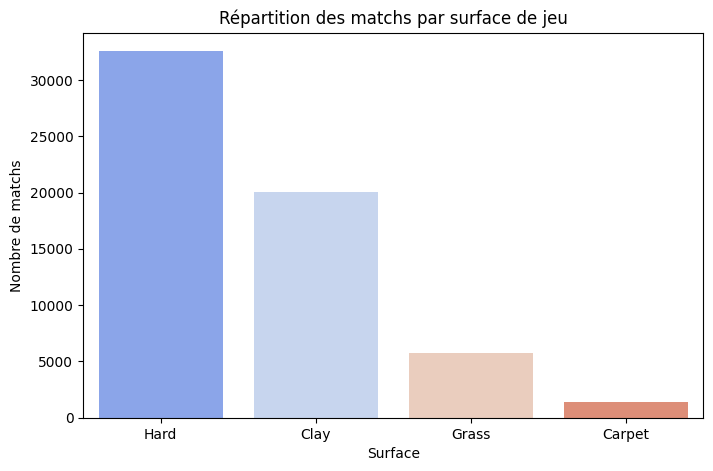

In [10]:
# R√©partition des matchs par surface

plt.figure(figsize=(8, 5))
sns.countplot(data=atpdata_matches, x="surface", order=atpdata_matches["surface"].value_counts().index, palette="coolwarm")
plt.title("R√©partition des matchs par surface de jeu")
plt.xlabel("Surface")
plt.ylabel("Nombre de matchs")
plt.show()


<ipython-input-11-11a71328f58f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atpdata_matches, x="surface", y="w_ace", palette="Set2")


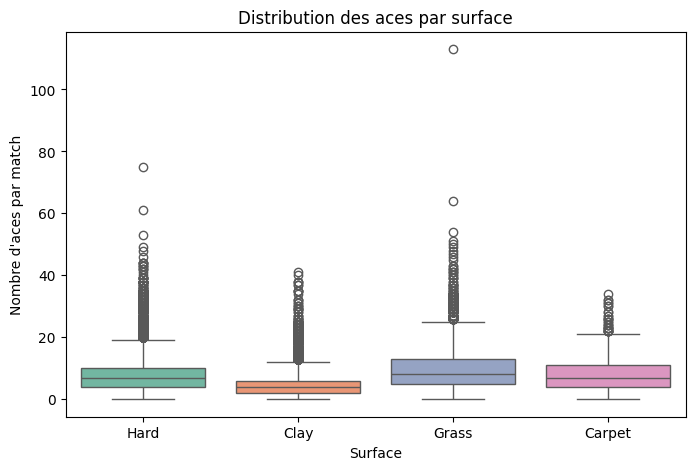

In [11]:
# Nombre d‚Äôaces selon la surface

plt.figure(figsize=(8, 5))
sns.boxplot(data=atpdata_matches, x="surface", y="w_ace", palette="Set2")
plt.title("Distribution des aces par surface")
plt.xlabel("Surface")
plt.ylabel("Nombre d'aces par match")
plt.show()

<ipython-input-12-1491e34d1495>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atpdata_matches, x="tourney_level", y="minutes", palette="husl")


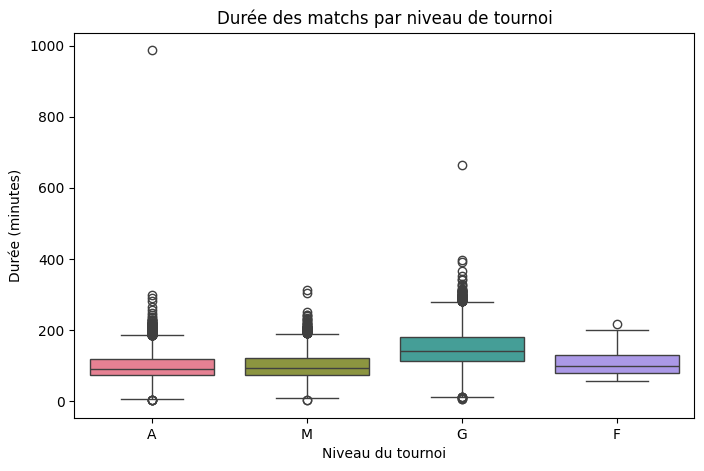

In [12]:
# Dur√©e des matchs par cat√©gorie de tournois
plt.figure(figsize=(8, 5))
sns.boxplot(data=atpdata_matches, x="tourney_level", y="minutes", palette="husl")
plt.title("Dur√©e des matchs par niveau de tournoi")
plt.xlabel("Niveau du tournoi")
plt.ylabel("Dur√©e (minutes)")
plt.show()

<ipython-input-16-d517fd106ce7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atpdata_matches, x="surface", y="minutes", palette="husl")


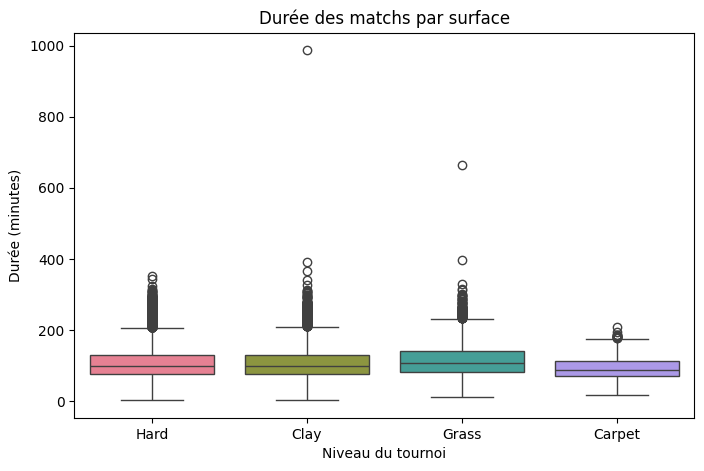

In [16]:
# Dur√©e des matchs par surface
plt.figure(figsize=(8, 5))
sns.boxplot(data=atpdata_matches, x="surface", y="minutes", palette="husl")
plt.title("Dur√©e des matchs par surface")
plt.xlabel("Niveau du tournoi")
plt.ylabel("Dur√©e (minutes)")
plt.show()

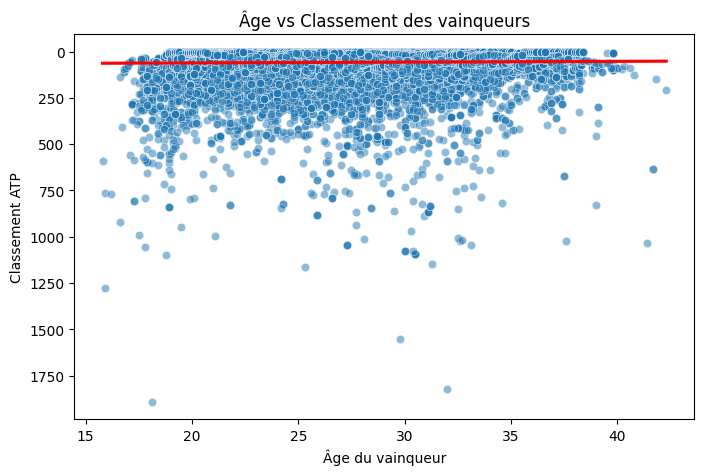

In [13]:
# Influence de l'age sur le classement des doueurs
plt.figure(figsize=(8, 5))
sns.scatterplot(data=atpdata_matches, x="winner_age", y="winner_rank", alpha=0.5)
sns.regplot(data=atpdata_matches, x="winner_age", y="winner_rank", scatter=False, color="red")
plt.title("√Çge vs Classement des vainqueurs")
plt.xlabel("√Çge du vainqueur")
plt.ylabel("Classement ATP")
plt.gca().invert_yaxis()
plt.show()

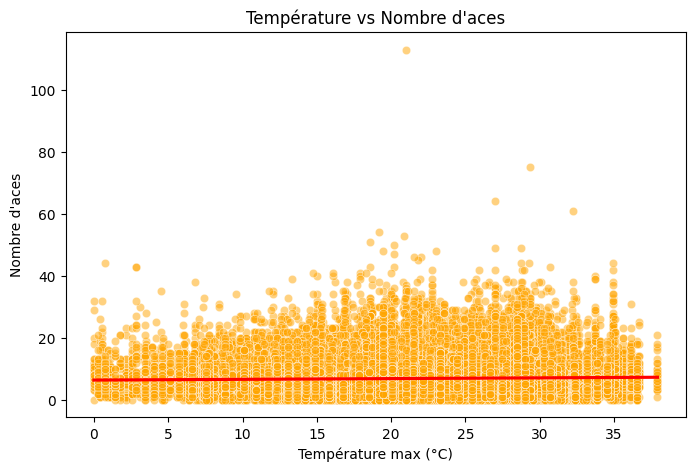

In [14]:
#Impact de la m√©t√©o sur la performance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=atpdata_matches, x="temperature_2m_max", y="w_ace", alpha=0.5, color="orange")
sns.regplot(data=atpdata_matches, x="temperature_2m_max", y="w_ace", scatter=False, color="red")
plt.title("Temp√©rature vs Nombre d'aces")
plt.xlabel("Temp√©rature max (¬∞C)")
plt.ylabel("Nombre d'aces")
plt.show()

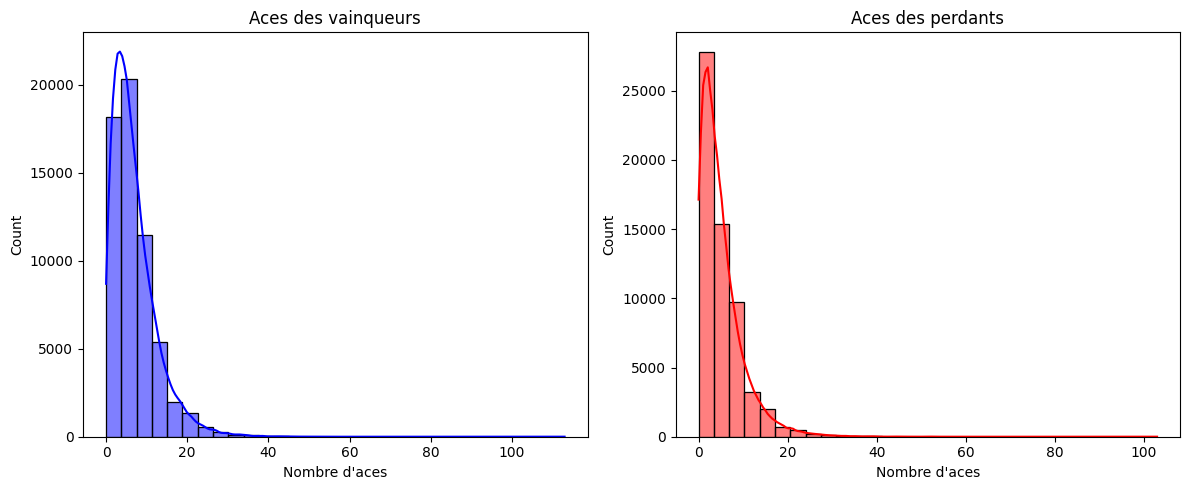

In [15]:
# Comparaison des aces entre les winners et les losers
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(atpdata_matches["w_ace"], bins=30, kde=True, color="blue", ax=ax[0])
ax[0].set_title("Aces des vainqueurs")
ax[0].set_xlabel("Nombre d'aces")

sns.histplot(atpdata_matches["l_ace"], bins=30, kde=True, color="red", ax=ax[1])
ax[1].set_title("Aces des perdants")
ax[1].set_xlabel("Nombre d'aces")

plt.tight_layout()
plt.show()


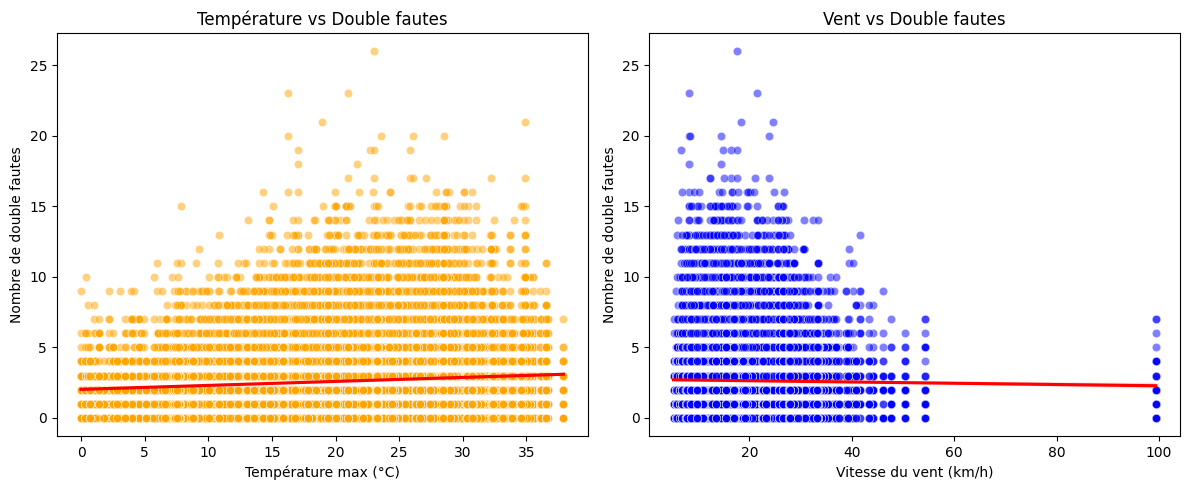

In [17]:
#Relation entre les donn√©es m√©t√©o et le nombre de fautes

plt.figure(figsize=(12, 5))

# Temp√©rature vs Double fautes
plt.subplot(1, 2, 1)
sns.scatterplot(data=atpdata_matches, x="temperature_2m_max", y="w_df", alpha=0.5, color="orange")
sns.regplot(data=atpdata_matches, x="temperature_2m_max", y="w_df", scatter=False, color="red")
plt.title("Temp√©rature vs Double fautes")
plt.xlabel("Temp√©rature max (¬∞C)")
plt.ylabel("Nombre de double fautes")

# Vent vs Double fautes
plt.subplot(1, 2, 2)
sns.scatterplot(data=atpdata_matches, x="wind_speed_10m_max", y="w_df", alpha=0.5, color="blue")
sns.regplot(data=atpdata_matches, x="wind_speed_10m_max", y="w_df", scatter=False, color="red")
plt.title("Vent vs Double fautes")
plt.xlabel("Vitesse du vent (km/h)")
plt.ylabel("Nombre de double fautes")

plt.tight_layout()
plt.show()


<ipython-input-18-5732a0c72422>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=atpdata_matches, x="surface", y="w_df", palette="muted")


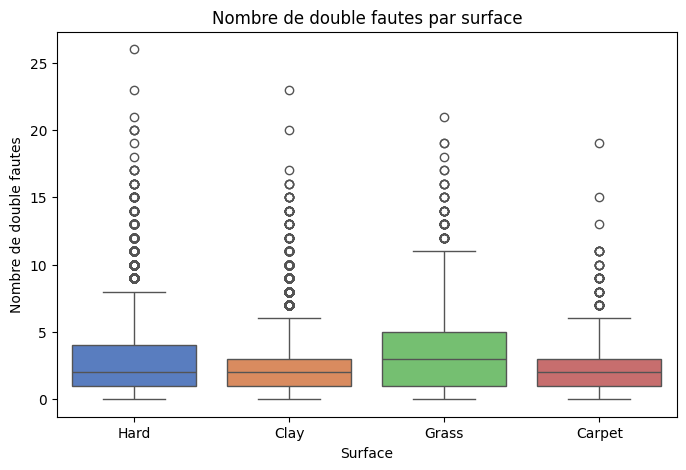

In [18]:
# Relation entre le nombre de double fautes et la surface
plt.figure(figsize=(8, 5))
sns.boxplot(data=atpdata_matches, x="surface", y="w_df", palette="muted")
plt.title("Nombre de double fautes par surface")
plt.xlabel("Surface")
plt.ylabel("Nombre de double fautes")
plt.show()


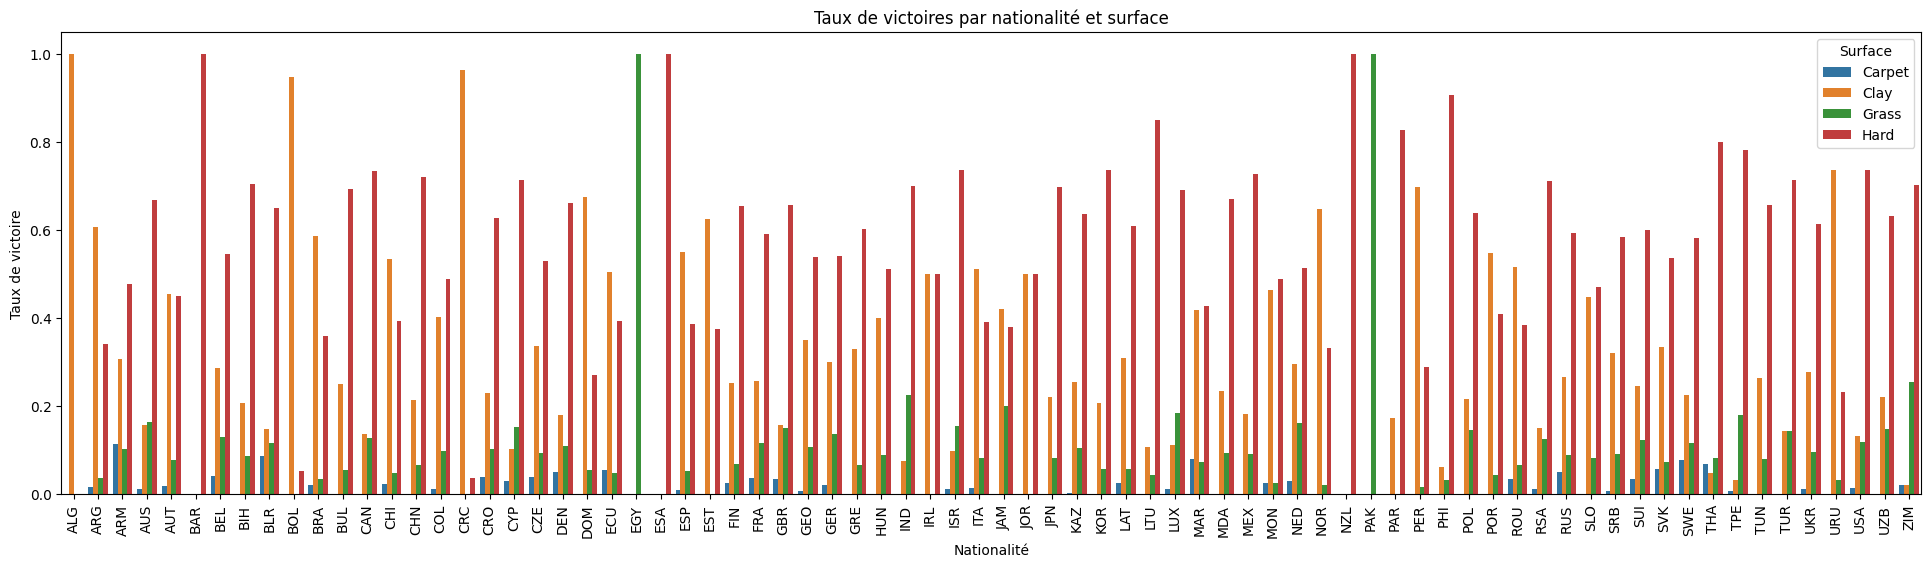

In [22]:
# Transformer les donn√©es pour un graphique en barres
win_rate_plot = win_rate.reset_index().melt(id_vars="winner_ioc", var_name="surface", value_name="win_rate")

# Cr√©ation du barplot empil√©
plt.figure(figsize=(24, 6))
sns.barplot(data=win_rate_plot, x="winner_ioc", y="win_rate", hue="surface")
plt.xticks(rotation=90)
plt.title("Taux de victoires par nationalit√© et surface")
plt.xlabel("Nationalit√©")
plt.ylabel("Taux de victoire")
plt.legend(title="Surface")
plt.show()

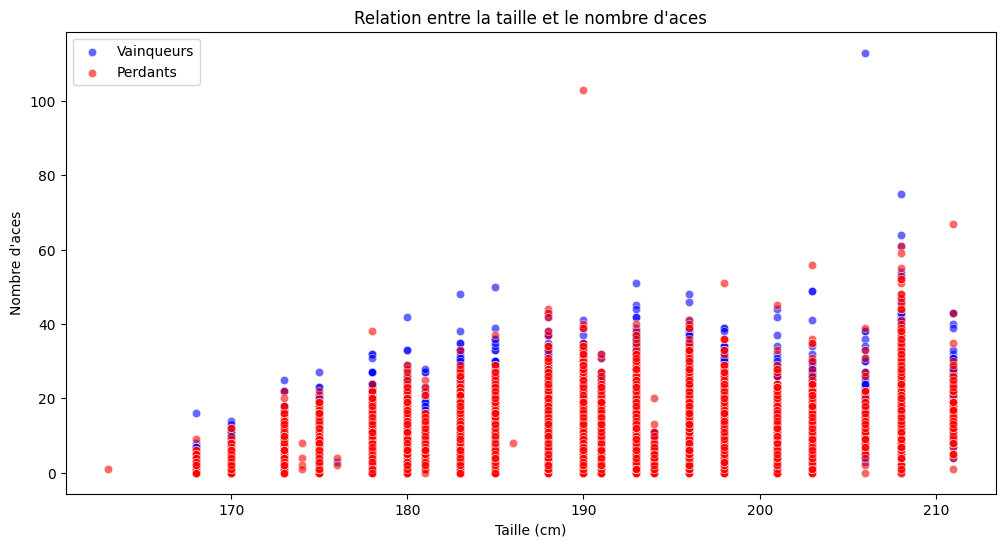

In [24]:
#Relation entre la taille et le nombre d'aces

plt.figure(figsize=(12, 6))
sns.scatterplot(data=atpdata_matches, x="winner_ht", y="w_ace", alpha=0.6, label="Vainqueurs", color="blue")
sns.scatterplot(data=atpdata_matches, x="loser_ht", y="l_ace", alpha=0.6, label="Perdants", color="red")

plt.title("Relation entre la taille et le nombre d'aces")
plt.xlabel("Taille (cm)")
plt.ylabel("Nombre d'aces")
plt.legend()
plt.show()


In [ ]:
pip install.packages("IRkernel")
IRkernel::installspec(user = TRUE)